In [171]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

from IPython.display import display
from scipy import stats
from matplotlib.lines import Line2D

In [12]:
data_360 = pd.read_csv('data_final/xbox_360_csv.csv')
data_360["platform"] = "xbox_360"
data_360.to_csv("data_final/xbox_360_csv.csv")

In [14]:
all_filenames = ["data_final/pc_csv.csv","data_final/ps4_csv.csv","data_final/switch_csv.csv","data_final/xbox_360_csv.csv","data_final/xbox_one_csv.csv","data_final/ps5_csv.csv"]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv( "data_final/combined_csv.csv", index=False, encoding='utf-8-sig')

In [15]:
data = pd.read_csv('data_final/combined_csv.csv')
data.shape

(3092, 9)

# Data Analysis Based on Game Content

In [16]:
# Show columns in csv files
data.columns

Index(['difficulty', 'length', 'name', 'rating', 'platform', 'sales', 'type1',
       'type2', 'Unnamed: 0'],
      dtype='object')

In [59]:
type_one = data['type1'].value_counts()
type_two = data['type2'].value_counts()
type_one.add(type_two,fill_value=0)
 
# Create the pandas DataFrame
df_type = pd.DataFrame(type_one.add(type_two,fill_value=0), columns=[ 'Count'])

In [77]:
# We count number of games for each type category
df_type.reset_index(inplace = True,drop=True)
new_df = df_type.drop(['level_0'], axis=1)
new_df = new_df.iloc[1:]
new_df

,index,Count
1,action,1679.0
2,adventure,837.0
3,miscellaneous,130.0
4,puzzle,34.0
5,racing,105.0
6,role-playing,527.0
7,simulation,69.0
8,sports,109.0
9,strategy,258.0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


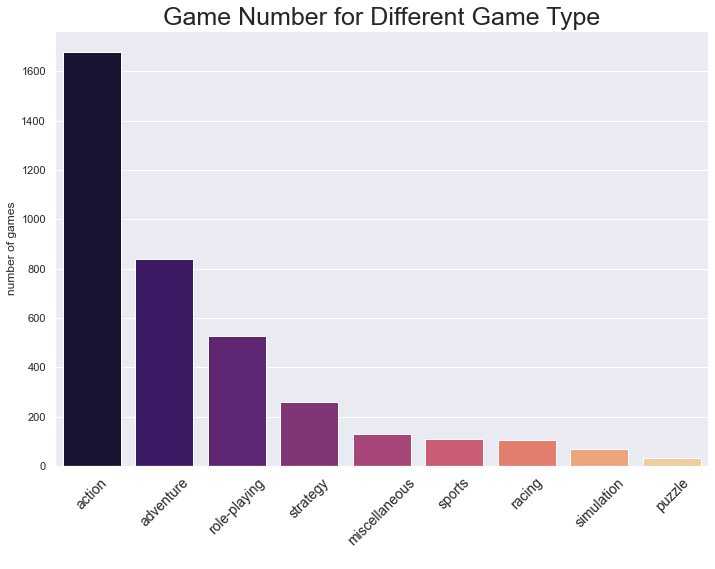

In [91]:
# we can use histgram to visualize the result
x = new_df[['index','Count']].sort_values(by = 'Count',ascending = False).reset_index()
sns.set(rc={'figure.figsize':(11.7,8)})
sns.barplot(x['index'], x['Count'], palette = 'magma')
plt.title('Game Number for Different Game Type', fontsize = 25)
plt.xticks(rotation = 45, fontsize = 14)
plt.xlabel(' ')
plt.ylabel('number of games')
plt.show()

In [105]:
# display maximum, minimum, and mean for game rating, difficulty, and length
display(data[['type1','rating',]].groupby(['type1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))
display(data[['type1','difficulty',]].groupby(['type1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))
display(data[['type1','length',]].groupby(['type1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

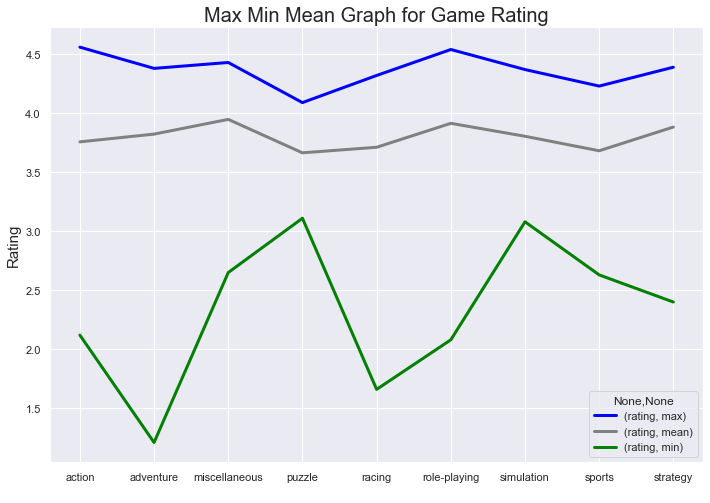

In [122]:
# draw line chart to visualize result below
display(data[['type1','rating',]].groupby(['type1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))
data[['type1','rating',]].groupby(['type1']).agg(['max','mean','min']).plot(kind = 'line', color = ['blue','grey','green'],linewidth=3.0)
plt.title('Max Min Mean Graph for Game Rating', fontsize = 20)
plt.ylabel('Rating', fontsize = 15)
plt.xlabel(' ',)
plt.show()

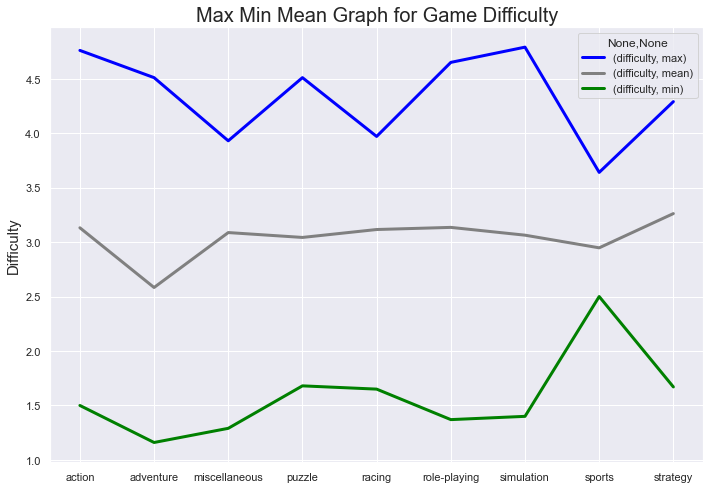

In [121]:
display(data[['type1','difficulty',]].groupby(['type1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))
data[['type1','difficulty',]].groupby(['type1']).agg(['max','mean','min']).plot(kind = 'line', color = ['blue','grey','green'],linewidth=3.0)
plt.title('Max Min Mean Graph for Game Difficulty', fontsize = 20)
plt.ylabel('Difficulty', fontsize = 15)
plt.xlabel(' ',)
plt.show()

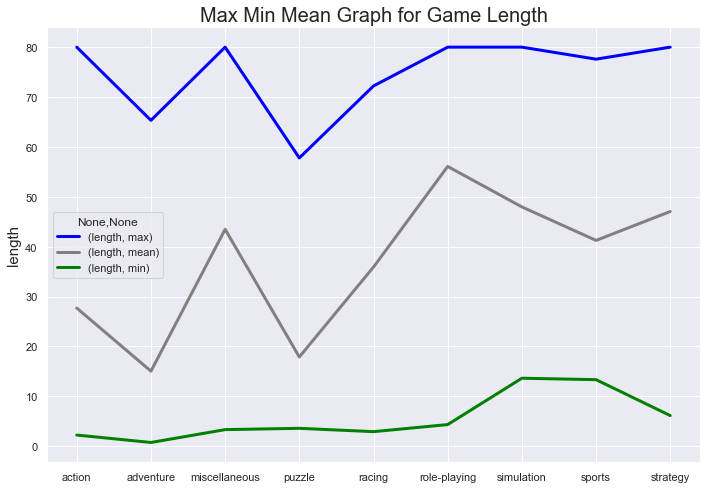

In [120]:
display(data[['type1','length',]].groupby(['type1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))
data[['type1','length',]].groupby(['type1']).agg(['max','mean','min']).plot(kind = 'line', color = ['blue','grey','green'],linewidth=3.0)
plt.title('Max Min Mean Graph for Game Length', fontsize = 20)
plt.ylabel('length', fontsize = 15)
plt.xlabel(' ',)
plt.show()

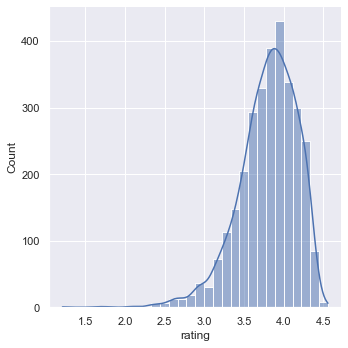

In [152]:
# display rating distribution
sns.displot(data=data['rating'] , kde=True, bins=30)

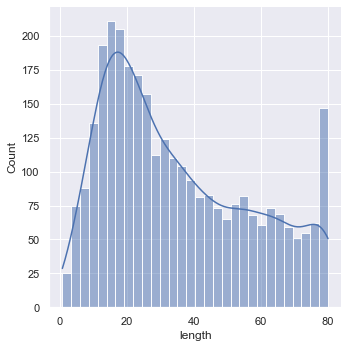

In [138]:
# display game length distribution
sns.displot(data=data['length'] , kde=True, bins=30)

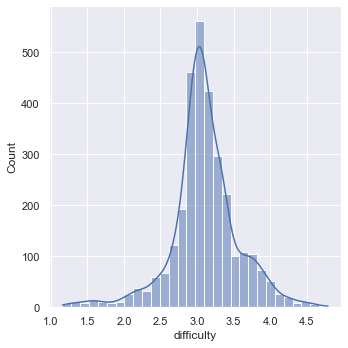

In [153]:
# display game difficulty distribution
sns.displot(data=data['difficulty'] , kde=True, bins=30)

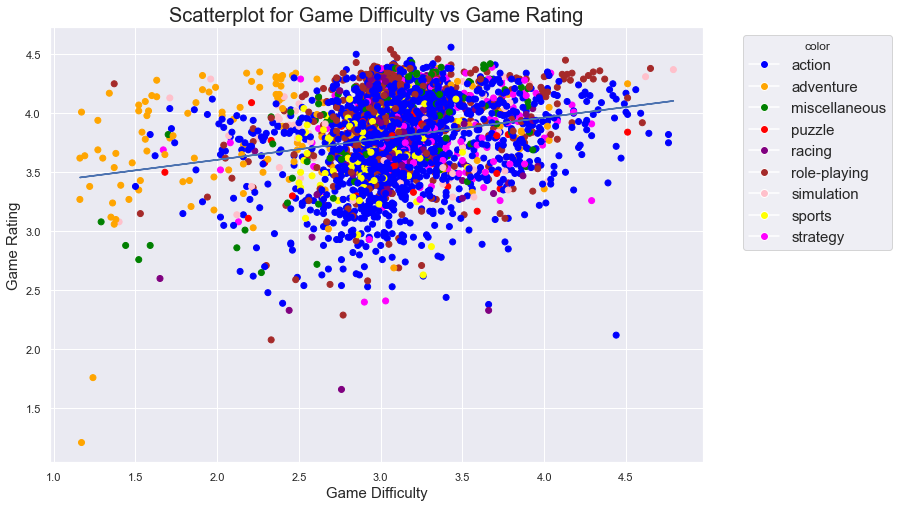

In [183]:
# draw scatterplot and regression line between game difficulty and rating
x = data['difficulty']
y = data['rating']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

colors = {'action':'blue', 'adventure':'orange', 'miscellaneous':'green', 'puzzle':'red', 'racing':'purple', 'role-playing':'brown', 'simulation':'pink','sports':'yellow','strategy':'magenta'}
mymodel = list(map(myfunc, x))

plt.title('Scatterplot for Game Difficulty vs Game Rating', fontsize = 20)
plt.ylabel('Game Rating', fontsize = 15)
plt.xlabel('Game Difficulty', fontsize = 15)

plt.scatter(x, y,c=data['type1'].map(colors))
plt.plot(x, mymodel)
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='color',handles=handles, bbox_to_anchor=(1.05, 1),fontsize=15)
plt.show()

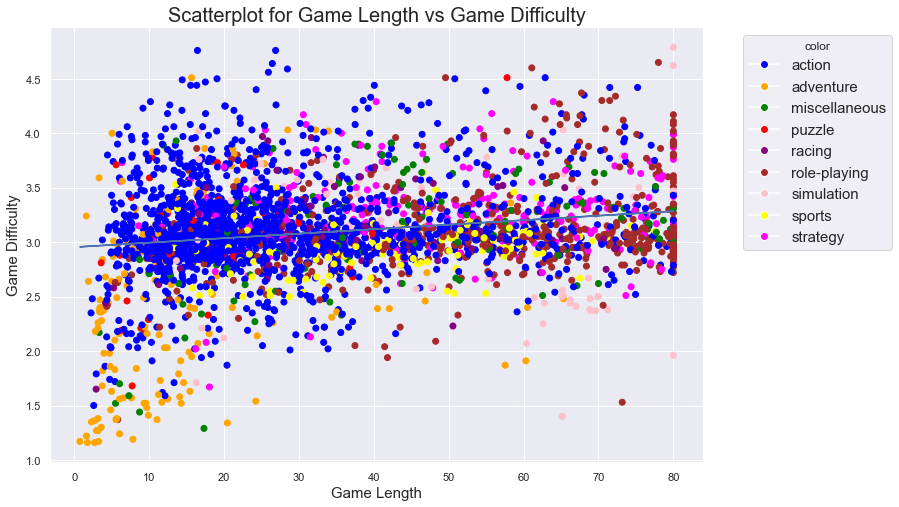

In [184]:
# draw scatterplot and regression line between game length and difficulty
x = data['length']
y = data['difficulty']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

colors = {'action':'blue', 'adventure':'orange', 'miscellaneous':'green', 'puzzle':'red', 'racing':'purple', 'role-playing':'brown', 'simulation':'pink','sports':'yellow','strategy':'magenta'}
mymodel = list(map(myfunc, x))

plt.title('Scatterplot for Game Length vs Game Difficulty', fontsize = 20)
plt.ylabel('Game Difficulty', fontsize = 15)
plt.xlabel('Game Length', fontsize = 15)

plt.scatter(x, y,c=data['type1'].map(colors))
plt.plot(x, mymodel)
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='color',handles=handles, bbox_to_anchor=(1.05, 1),fontsize=15)
plt.show()

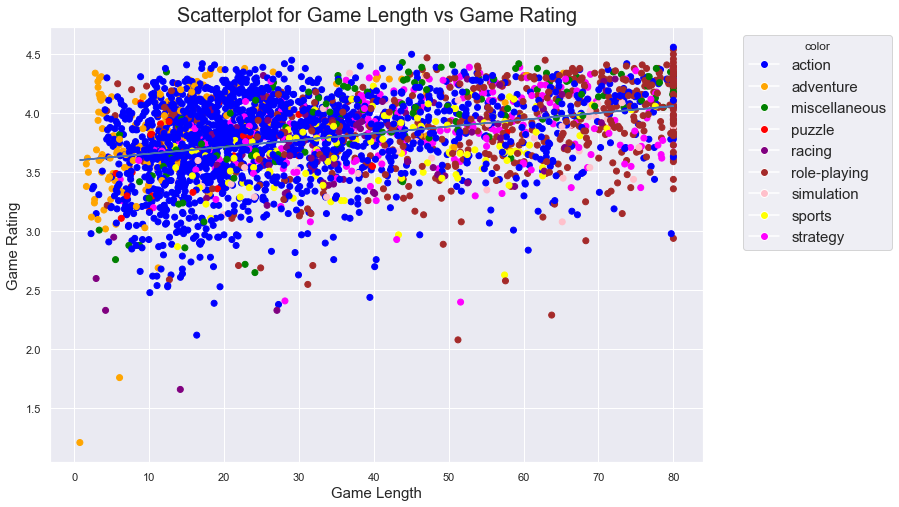

In [185]:
# draw scatterplot and regression line between game length and rating
x = data['length']
y = data['rating']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

colors = {'action':'blue', 'adventure':'orange', 'miscellaneous':'green', 'puzzle':'red', 'racing':'purple', 'role-playing':'brown', 'simulation':'pink','sports':'yellow','strategy':'magenta'}
mymodel = list(map(myfunc, x))

plt.title('Scatterplot for Game Length vs Game Rating', fontsize = 20)
plt.ylabel('Game Rating', fontsize = 15)
plt.xlabel('Game Length', fontsize = 15)

plt.scatter(x, y,c=data['type1'].map(colors))
plt.plot(x, mymodel)
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
plt.legend(title='color',handles=handles, bbox_to_anchor=(1.05, 1),fontsize=15)
plt.show()